In [ ]:
import pandas as pd
import numpy as np

file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Filter the DataFrame for female customers who have churned
female_churned = df[(df['gender'] == 'Female') & (df['Churn'] == 'Yes')]

# Filter the DataFrame for male customers who have churned
male_churned = df[(df['gender'] == 'Male') & (df['Churn'] == 'Yes')]

# Count the number of female and male customers who have churned
female_churn_count = len(female_churned)
male_churn_count = len(male_churned)

# Print the counts
print(f"Female customers who have churned: {female_churn_count}")
print(f"Male customers who have churned: {male_churn_count}")


Female customers who have churned: 939
Male customers who have churned: 930


In [ ]:
df['Churn'].value_counts()
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Group by 'Contract' and count the churn values
contract_churn_counts =df.groupby('Contract')['Churn'].value_counts().unstack().fillna(0)

# Calculate and print the churn percentages
for contract_type in contract_churn_counts.index:
    churn_yes = contract_churn_counts.loc[contract_type, 'Yes']
    total = contract_churn_counts.loc[contract_type].sum()
    percentage = (churn_yes / total) * 100
    print(f"Contract: {contract_type}, Churn Percentage: {percentage:.2f}%")


Contract: Month-to-month, Churn Percentage: 42.71%
Contract: One year, Churn Percentage: 11.27%
Contract: Two year, Churn Percentage: 2.83%


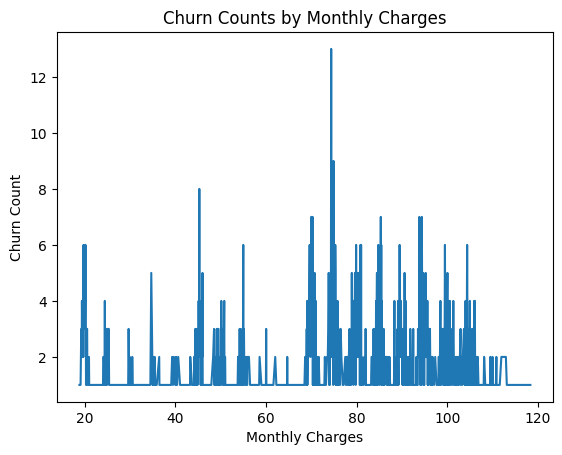

In [ ]:
import matplotlib.pyplot as plt

monthly_churn_counts = df[df['Churn'] == 'Yes'].groupby('MonthlyCharges')['Churn'].count()

# Create a bar plot
monthly_churn_counts.plot()
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Count')
plt.title('Churn Counts by Monthly Charges')
plt.show()



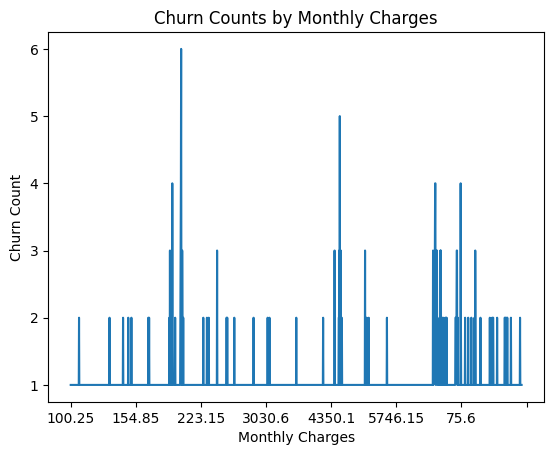

In [ ]:
total_churn_counts = df[df['Churn'] == 'Yes'].groupby('TotalCharges')['Churn'].count()

# Create a bar plot
total_churn_counts.plot()
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Count')
plt.title('Churn Counts by Monthly Charges')
plt.show()

In [ ]:
print(df.groupby('PaymentMethod')['Churn'].value_counts())

PaymentMethod_churn_counts = df.groupby('PaymentMethod')['Churn'].value_counts().unstack().fillna(0)

# Calculate and print the churn percentages
for PaymentMethod_type in PaymentMethod_churn_counts.index:
    churn_yes = PaymentMethod_churn_counts.loc[PaymentMethod_type, 'Yes']
    total = PaymentMethod_churn_counts.loc[PaymentMethod_type].sum()
    percentage = (churn_yes / total) * 100
    print(f"PaymentMethod: {PaymentMethod_type}, Churn Percentage: {percentage:.2f}%")


PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
Name: Churn, dtype: int64
PaymentMethod: Bank transfer (automatic), Churn Percentage: 16.71%
PaymentMethod: Credit card (automatic), Churn Percentage: 15.24%
PaymentMethod: Electronic check, Churn Percentage: 45.29%
PaymentMethod: Mailed check, Churn Percentage: 19.11%


In [ ]:
# Group by 'Partner' and count the churn values
partner_churn_counts =df.groupby('Partner')['Churn'].value_counts().unstack().fillna(0)

# Calculate and print the churn percentages
for partner_type in partner_churn_counts.index:
    churn_yes = partner_churn_counts.loc[partner_type, 'Yes']
    total = partner_churn_counts.loc[partner_type].sum()
    percentage = (churn_yes / total) * 100
    print(f"partner: {partner_type}, Churn Percentage: {percentage:.2f}%")

partner: No, Churn Percentage: 32.96%
partner: Yes, Churn Percentage: 19.66%


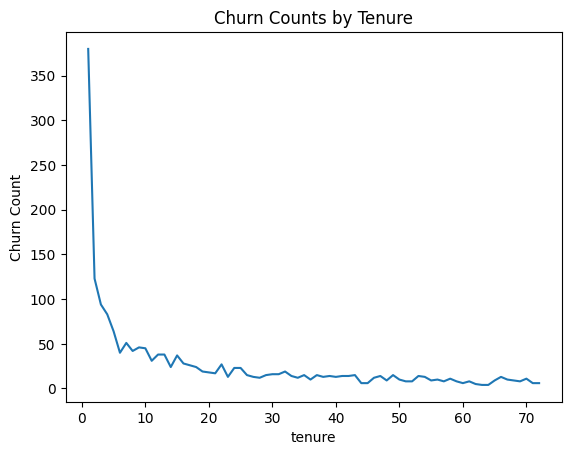

In [ ]:
total_churn_counts = df[df['Churn'] == 'Yes'].groupby('tenure')['Churn'].count()

total_churn_counts.plot()
plt.xlabel('tenure')
plt.ylabel('Churn Count')
plt.title('Churn Counts by Tenure')
plt.show()

In [ ]:
print(df.groupby('InternetService')['Churn'].value_counts())

InternetService_churn_counts = df.groupby('InternetService')['Churn'].value_counts().unstack().fillna(0)

# Calculate and print the churn percentages
for InternetService_type in InternetService_churn_counts.index:
    churn_yes = InternetService_churn_counts.loc[InternetService_type, 'Yes']
    total = InternetService_churn_counts.loc[InternetService_type].sum()
    percentage = (churn_yes / total) * 100
    print(f"InternetService: {InternetService_type}, Churn Percentage: {percentage:.2f}%")

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: Churn, dtype: int64
InternetService: DSL, Churn Percentage: 18.96%
InternetService: Fiber optic, Churn Percentage: 41.89%
InternetService: No, Churn Percentage: 7.40%


In [ ]:
import pandas as pd

categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Function to calculate and print churn percentages
def calculate_and_print_churn_percentages(df, column):
    churn_counts = df.groupby(column)['Churn'].value_counts().unstack().fillna(0)
    for category in churn_counts.index:
        churn_yes = churn_counts.loc[category, 'Yes']
        total = churn_counts.loc[category].sum()
        percentage = (churn_yes / total) * 100
        print(f"{column}: {category}, Churn Percentage: {percentage:.2f}%")

# Calculate and print churn percentages for each categorical column
for column in categorical_columns:
    calculate_and_print_churn_percentages(df, column)
    print("\n")

gender: Female, Churn Percentage: 26.92%
gender: Male, Churn Percentage: 26.16%


Partner: No, Churn Percentage: 32.96%
Partner: Yes, Churn Percentage: 19.66%


Dependents: No, Churn Percentage: 31.28%
Dependents: Yes, Churn Percentage: 15.45%


PhoneService: No, Churn Percentage: 24.93%
PhoneService: Yes, Churn Percentage: 26.71%


MultipleLines: No, Churn Percentage: 25.04%
MultipleLines: No phone service, Churn Percentage: 24.93%
MultipleLines: Yes, Churn Percentage: 28.61%


InternetService: DSL, Churn Percentage: 18.96%
InternetService: Fiber optic, Churn Percentage: 41.89%
InternetService: No, Churn Percentage: 7.40%


OnlineSecurity: No, Churn Percentage: 41.77%
OnlineSecurity: No internet service, Churn Percentage: 7.40%
OnlineSecurity: Yes, Churn Percentage: 14.61%


OnlineBackup: No, Churn Percentage: 39.93%
OnlineBackup: No internet service, Churn Percentage: 7.40%
OnlineBackup: Yes, Churn Percentage: 21.53%


DeviceProtection: No, Churn Percentage: 39.13%
DeviceProtection: 